<a href="https://colab.research.google.com/github/aibak365/Machine-learning/blob/main/machine_learning_course_ML_course_midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import glob
import os

In [ ]:
FILE_PATH = "/content/drive/MyDrive/DataSet2/*/*.csv"

In [ ]:
files = file_path_list = glob.glob(FILE_PATH)

df = pd.DataFrame(files, columns=['filePath'])
df['filename'] = df['filePath'].apply(lambda x: os.path.basename(x))
df['expId'] = df['filename'].apply(lambda x: int(x.split('_')[0][:3]))
df['sensor'] = df['filename'].apply(lambda x: x.split('_')[4].lower())
df['frequency'] = df['filename'].apply(lambda x: x.split("_")[5])
df['timestamp'] = df['filename'].apply(lambda x: x.split("_")[2].split(".")[0])
print(df.info())
print("\n-------------------------------------------------------")
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   filePath   848 non-null    object
 1   filename   848 non-null    object
 2   expId      848 non-null    int64 
 3   sensor     848 non-null    object
 4   frequency  848 non-null    object
 5   timestamp  848 non-null    object
dtypes: int64(1), object(5)
memory usage: 39.9+ KB
None

-------------------------------------------------------
                                            filePath  \
0  /content/drive/MyDrive/DataSet2/User24/298_Met...   
1  /content/drive/MyDrive/DataSet2/User24/298_Met...   
2  /content/drive/MyDrive/DataSet2/User24/298_Met...   
3  /content/drive/MyDrive/DataSet2/User24/299_Met...   
4  /content/drive/MyDrive/DataSet2/User24/298_Met...   

                                            filename  expId         sensor  \
0  298_MetaWear_2021-08-01T15.45.23.140_EB942CED9...    

In [ ]:
print(df['expId'].value_counts()) # some exp have 4 or 5 or 3, i can go more in case, using tolist
print()
print(df['expId'].value_counts().to_list().count(4))
print(df['expId'].value_counts().to_list().count(5))
print(df['expId'].value_counts().to_list().count(3))
print()
print(max(df['expId'].value_counts().to_list()))
print(min(df['expId'].value_counts().to_list()))

expId
331    5
298    4
169    4
252    4
249    4
      ..
327    3
171    3
334    3
325    3
173    3
Name: count, Length: 213, dtype: int64

207
1
5

5
3


In [ ]:
print(df['sensor'].value_counts())

sensor
accelerometer    212
pressure         212
gyroscope        212
magnetometer     212
Name: count, dtype: int64


In [ ]:
df['expId'].min(), df['expId'].max()

(133, 351)

In [ ]:
# Just to check what is missing
exp = np.array([])
is_there = {}
for file in files:
  is_there[file.split('/')[-1].split('_')[0][:3]] = 0

for file in files:

  try:
    if is_there[file.split('/')[-1].split('_')[0][:3]]!=1:
      exp = np.append(exp, file.split('/')[-1].split('_')[0][:3])
  except:
    print(file.split('/')[-1].split('_')[0][:3])
  is_there[file.split('/')[-1].split('_')[0][:3]] = 1

print(f"the number of experiments {len(exp)} ,start from {sorted(exp)[0]}, end with {sorted(exp)[-1]}\n")
for i in range(133,352):
  try:
    exp[i-133]
  except:
    print(f"the exp number {i} is missing")

the number of experiments 213 ,start from 133, end with 351

the exp number 346 is missing
the exp number 347 is missing
the exp number 348 is missing
the exp number 349 is missing
the exp number 350 is missing
the exp number 351 is missing


In [ ]:
expDic = {1: "Siting and Reading a Book", 2: "Sitting and Writing a Notebook", 3: "Typing using computer", 4: "Browsing", 5: "Moving head, body while sitting", 6: "Moving chair while sitting", 7: "Standup from sitting", 8: "Standing", 9: "Walking", 10: "Running", 11: "Taking Stairs"}
def expNo(expId):
  if expId % 11 == 0:
    return 11

  return expId % 11

def expName(expNo):
  return expDic[expNo]
df["expNo"] = df["expId"].apply(expNo)
df["expName"] = df["expNo"].apply(expName)
# decided to divide them, cuz it is eaiser for me when writing the code
accelerometer = df[df['sensor'] == 'accelerometer']
gyroscope = df[df['sensor'] == 'gyroscope']
magnetometer = df[df['sensor'] == 'magnetometer']
pressure = df[df['sensor'] == 'pressure']

In [ ]:
df.isna().sum()

,0
filePath,0
filename,0
expId,0
sensor,0
frequency,0
timestamp,0
expNo,0
expName,0


In [ ]:
duplicates = df.duplicated() # check for duplicates
print(duplicates.sum())

0


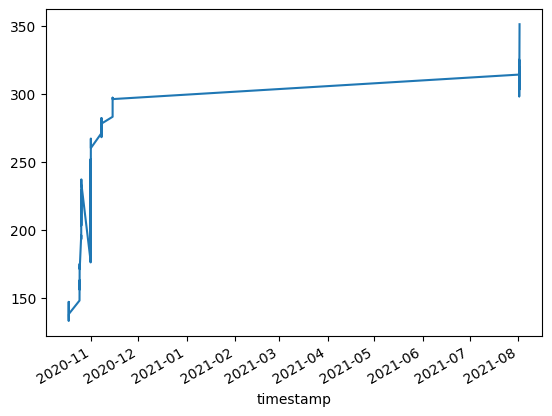

In [ ]:
df_sorted = df.sort_values(by='timestamp')
df_sorted['timestamp'] = pd.to_datetime(df_sorted['timestamp'])
df_sorted.set_index('timestamp')['expId'].plot()

plt.show()

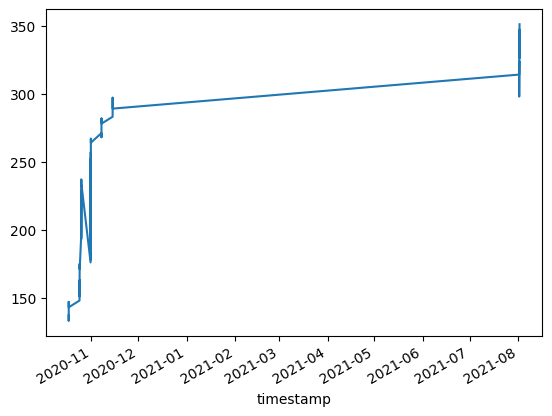

In [ ]:
accelerometer_sort = accelerometer.sort_values(by='timestamp')
accelerometer_sort['timestamp'] = pd.to_datetime(accelerometer_sort['timestamp'])
accelerometer_sort.set_index('timestamp')['expId'].plot()
plt.show()

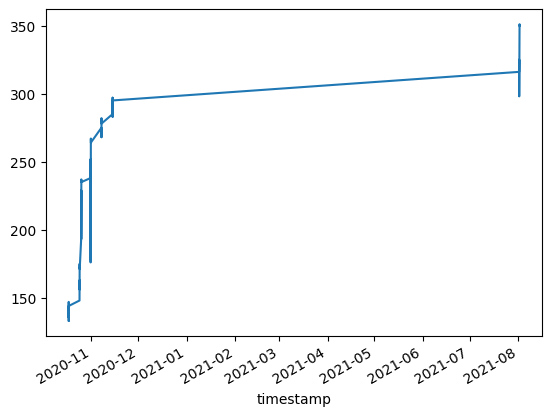

In [ ]:
gyroscope_sort = gyroscope.sort_values(by='timestamp')
gyroscope_sort['timestamp'] = pd.to_datetime(gyroscope_sort['timestamp'])
gyroscope_sort.set_index('timestamp')['expId'].plot()
plt.show()

In [ ]:
pd.read_csv(accelerometer[accelerometer['expNo']==1].iloc[1, :]['filePath']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13928 entries, 0 to 13927
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   epoch (ms)     13928 non-null  int64  
 1   time (-13:00)  13928 non-null  object 
 2   elapsed (s)    13928 non-null  float64
 3   x-axis (g)     13928 non-null  float64
 4   y-axis (g)     13928 non-null  float64
 5   z-axis (g)     13928 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 653.0+ KB


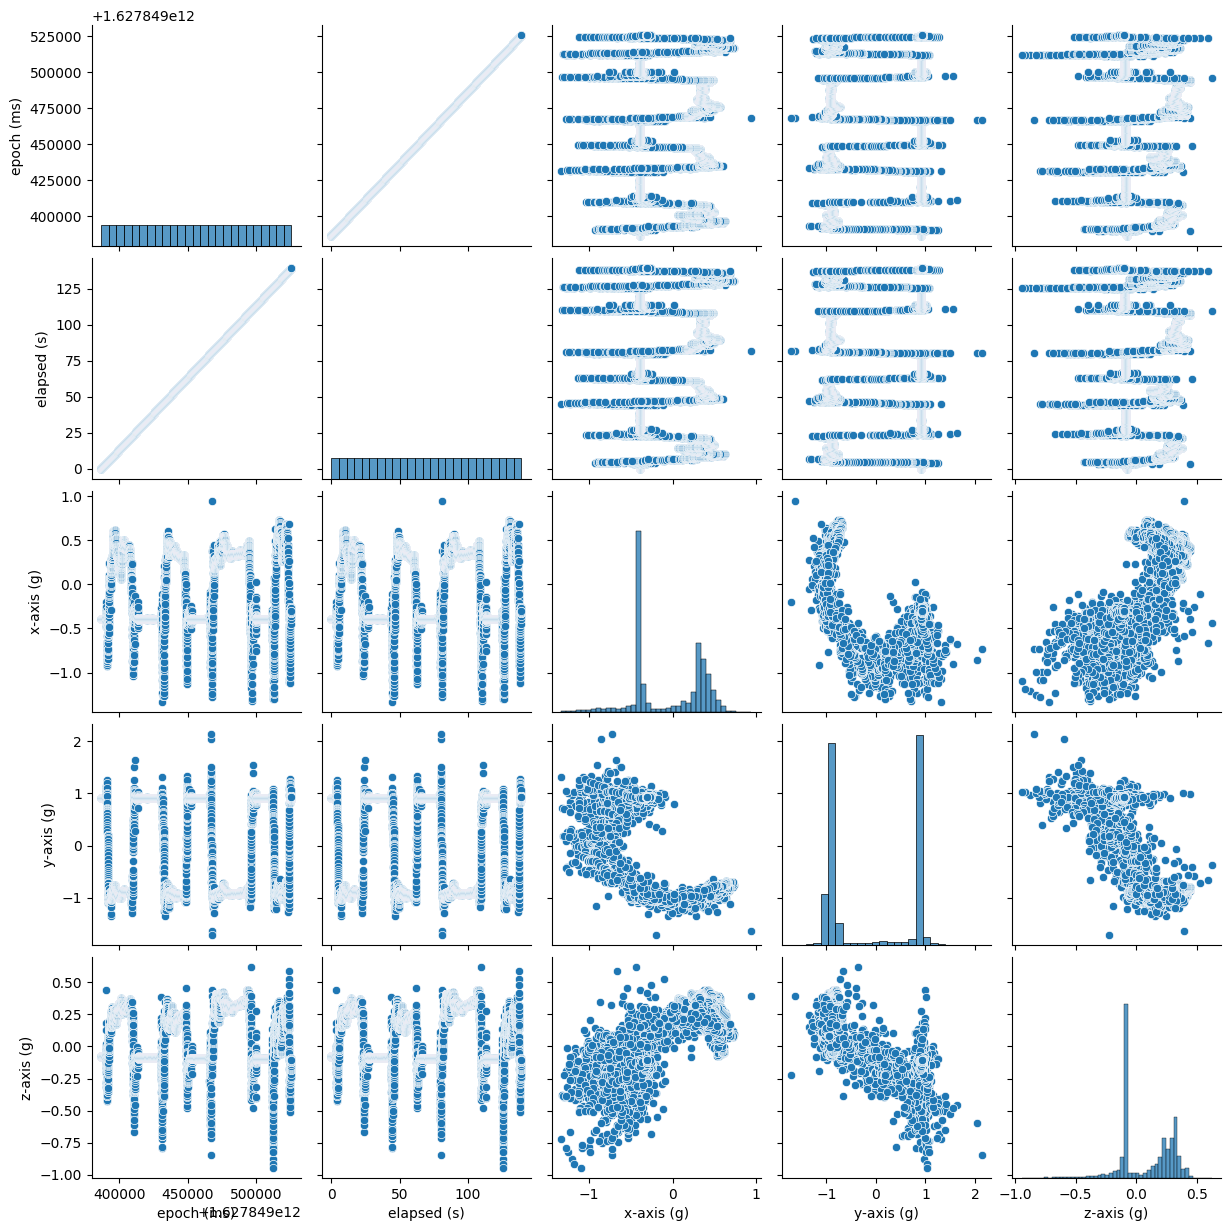

In [ ]:
# let's say the pair plot for one of these files of the accelmeator
sns.pairplot(pd.read_csv(accelerometer[accelerometer['expNo']==1].iloc[1, :]['filePath']))
plt.show()

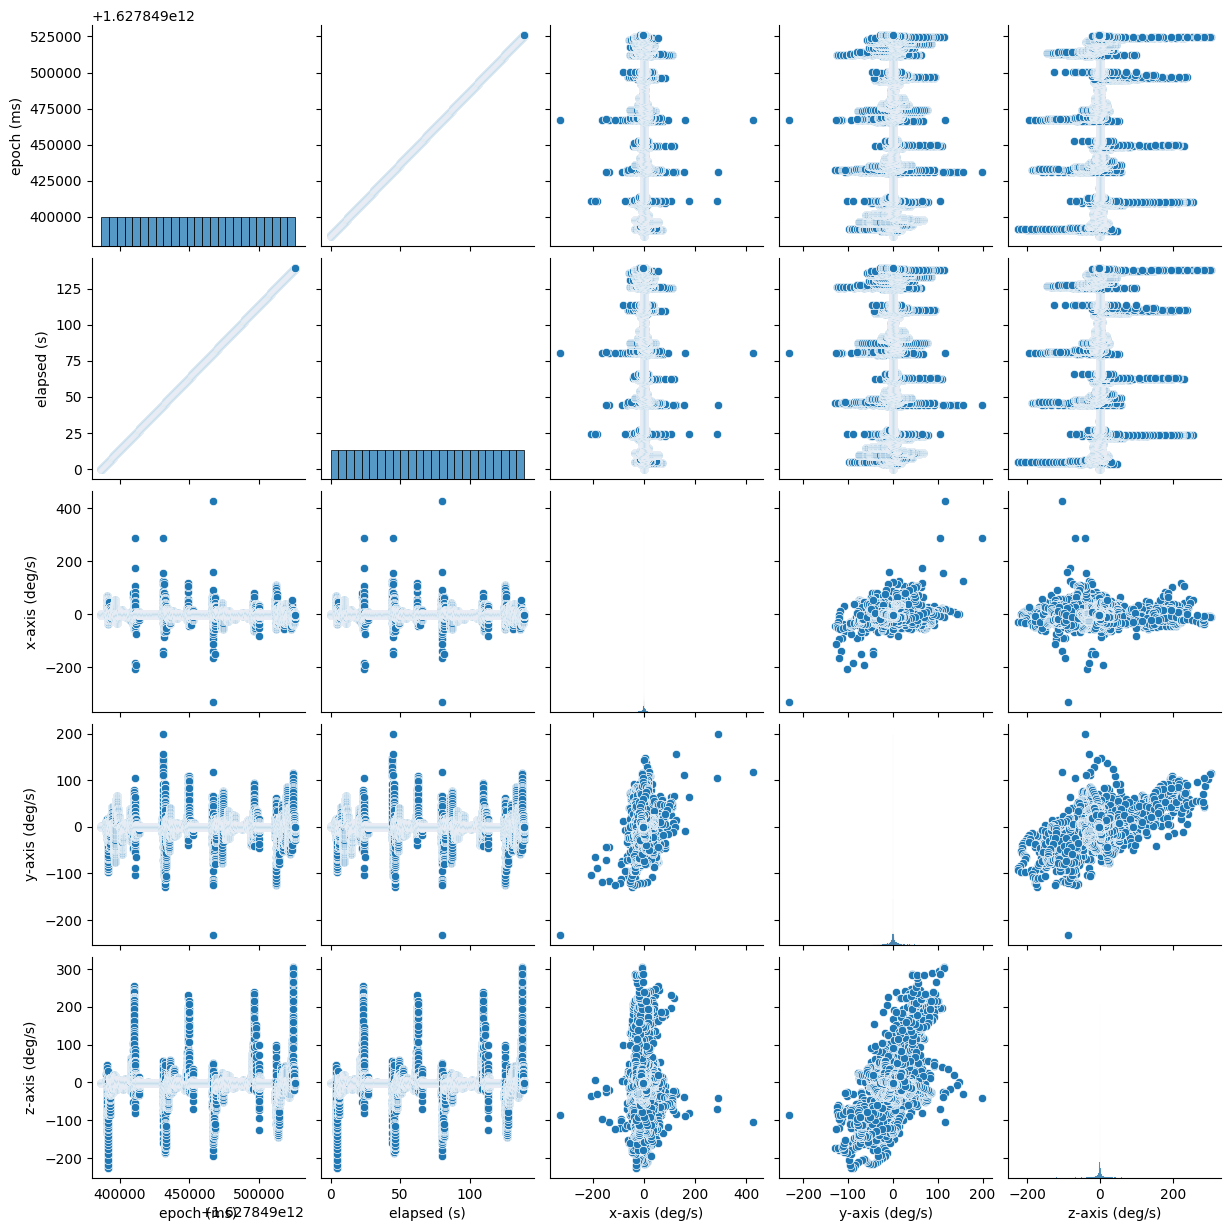

In [ ]:
# let's say the pair plot for one of these files of the gyrscope
sns.pairplot(pd.read_csv(gyroscope[gyroscope['expNo']==1].iloc[1, :]['filePath']))
plt.show()

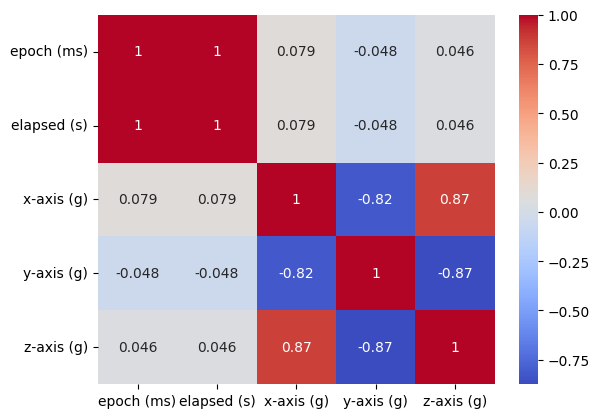

In [ ]:
tmp_df = pd.read_csv(accelerometer[accelerometer['expNo']==1].iloc[1, :]['filePath'])
tmp_df = tmp_df.drop('time (-13:00)',axis = 1)
sns.heatmap(tmp_df.corr(), annot=True, cmap='coolwarm')
plt.show()

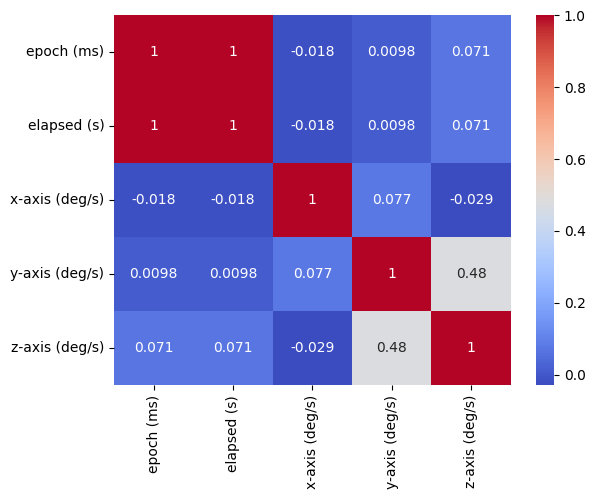

In [ ]:
tmp_df = pd.read_csv(gyroscope[gyroscope['expNo']==1].iloc[1, :]['filePath'])
tmp_df = tmp_df.drop('time (-13:00)',axis = 1)
sns.heatmap(tmp_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
df.describe()

,expId,expNo
count,848.000000,848.000000
mean,240.586085,5.954009
std,62.788317,3.166234
min,133.000000,1.000000
25%,187.000000,3.000000
50%,240.000000,6.000000
75%,294.000000,9.000000
max,351.000000,11.000000


In [ ]:
accelerometer.describe()

,expId,expNo
count,212.000000,212.000000
mean,240.212264,5.943396
std,62.834223,3.182685
min,133.000000,1.000000
25%,186.750000,3.000000
50%,239.500000,6.000000
75%,293.250000,9.000000
max,351.000000,11.000000


In [ ]:
gyroscope.describe()

,expId,expNo
count,212.000000,212.000000
mean,240.948113,5.952830
std,62.957912,3.166418
min,133.000000,1.000000
25%,187.750000,3.000000
50%,240.500000,6.000000
75%,294.250000,9.000000
max,351.000000,11.000000


In [ ]:
magnetometer.describe()

,expId,expNo
count,212.000000,212.000000
mean,240.226415,5.957547
std,62.855176,3.168729
min,133.000000,1.000000
25%,186.750000,3.000000
50%,239.500000,6.000000
75%,293.250000,9.000000
max,351.000000,11.000000


In [ ]:
pressure.describe()

,expId,expNo
count,212.000000,212.000000
mean,240.957547,5.962264
std,62.947530,3.169537
min,133.000000,1.000000
25%,187.750000,3.000000
50%,240.500000,6.000000
75%,294.250000,9.000000
max,351.000000,11.000000


In [ ]:
accelerometer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212 entries, 0 to 847
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   filePath   212 non-null    object
 1   filename   212 non-null    object
 2   expId      212 non-null    int64 
 3   sensor     212 non-null    object
 4   frequency  212 non-null    object
 5   timestamp  212 non-null    object
 6   expNo      212 non-null    int64 
 7   expName    212 non-null    object
dtypes: int64(2), object(6)
memory usage: 14.9+ KB


In [ ]:
gyroscope.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212 entries, 2 to 843
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   filePath   212 non-null    object
 1   filename   212 non-null    object
 2   expId      212 non-null    int64 
 3   sensor     212 non-null    object
 4   frequency  212 non-null    object
 5   timestamp  212 non-null    object
 6   expNo      212 non-null    int64 
 7   expName    212 non-null    object
dtypes: int64(2), object(6)
memory usage: 14.9+ KB


In [ ]:
magnetometer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212 entries, 4 to 845
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   filePath   212 non-null    object
 1   filename   212 non-null    object
 2   expId      212 non-null    int64 
 3   sensor     212 non-null    object
 4   frequency  212 non-null    object
 5   timestamp  212 non-null    object
 6   expNo      212 non-null    int64 
 7   expName    212 non-null    object
dtypes: int64(2), object(6)
memory usage: 14.9+ KB


In [ ]:
pressure.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212 entries, 1 to 842
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   filePath   212 non-null    object
 1   filename   212 non-null    object
 2   expId      212 non-null    int64 
 3   sensor     212 non-null    object
 4   frequency  212 non-null    object
 5   timestamp  212 non-null    object
 6   expNo      212 non-null    int64 
 7   expName    212 non-null    object
dtypes: int64(2), object(6)
memory usage: 14.9+ KB


In [ ]:
gyroscope.head()

,filePath,filename,expId,sensor,frequency,timestamp,expNo,expName
2,/content/drive/MyDrive/DataSet2/User24/298_Met...,298_MetaWear_2021-08-01T15.45.23.140_EB942CED9...,298,gyroscope,100.000Hz,2021-08-01T15,1,Siting and Reading a Book
6,/content/drive/MyDrive/DataSet2/User24/299_Met...,299_MetaWear_2021-08-01T15.48.21.710_EB942CED9...,299,gyroscope,100.000Hz,2021-08-01T15,2,Sitting and Writing a Notebook
9,/content/drive/MyDrive/DataSet2/User24/305_Met...,305_MetaWear_2021-08-01T16.10.47.481_EB942CED9...,305,gyroscope,100.000Hz,2021-08-01T16,8,Standing
10,/content/drive/MyDrive/DataSet2/User24/303_Met...,303_MetaWear_2021-08-01T16.02.41.721_EB942CED9...,303,gyroscope,100.000Hz,2021-08-01T16,6,Moving chair while sitting
18,/content/drive/MyDrive/DataSet2/User24/306_Met...,306_MetaWear_2021-08-01T16.26.19.499_EB942CED9...,306,gyroscope,100.000Hz,2021-08-01T16,9,Walking


In [ ]:
magnetometer.head()

,filePath,filename,expId,sensor,frequency,timestamp,expNo,expName
4,/content/drive/MyDrive/DataSet2/User24/298_Met...,298_MetaWear_2021-08-01T15.45.23.140_EB942CED9...,298,magnetometer,20.000Hz,2021-08-01T15,1,Siting and Reading a Book
5,/content/drive/MyDrive/DataSet2/User24/299_Met...,299_MetaWear_2021-08-01T15.48.21.710_EB942CED9...,299,magnetometer,20.000Hz,2021-08-01T15,2,Sitting and Writing a Notebook
8,/content/drive/MyDrive/DataSet2/User24/303_Met...,303_MetaWear_2021-08-01T16.02.41.721_EB942CED9...,303,magnetometer,20.000Hz,2021-08-01T16,6,Moving chair while sitting
12,/content/drive/MyDrive/DataSet2/User24/301_Met...,301_MetaWear_2021-08-01T15.54.46.474_EB942CED9...,301,magnetometer,20.000Hz,2021-08-01T15,4,Browsing
16,/content/drive/MyDrive/DataSet2/User24/304_Met...,304_MetaWear_2021-08-01T16.06.59.851_EB942CED9...,304,magnetometer,20.000Hz,2021-08-01T16,7,Standup from sitting


In [ ]:
pressure.head()

,filePath,filename,expId,sensor,frequency,timestamp,expNo,expName
1,/content/drive/MyDrive/DataSet2/User24/298_Met...,298_MetaWear_2021-08-01T15.45.23.140_EB942CED9...,298,pressure,7.330Hz,2021-08-01T15,1,Siting and Reading a Book
11,/content/drive/MyDrive/DataSet2/User24/304_Met...,304_MetaWear_2021-08-01T16.06.59.851_EB942CED9...,304,pressure,7.330Hz,2021-08-01T16,7,Standup from sitting
13,/content/drive/MyDrive/DataSet2/User24/302_Met...,302_MetaWear_2021-08-01T15.57.57.009_EB942CED9...,302,pressure,7.330Hz,2021-08-01T15,5,"Moving head, body while sitting"
17,/content/drive/MyDrive/DataSet2/User24/303_Met...,303_MetaWear_2021-08-01T16.02.41.721_EB942CED9...,303,pressure,7.330Hz,2021-08-01T16,6,Moving chair while sitting
20,/content/drive/MyDrive/DataSet2/User24/305_Met...,305_MetaWear_2021-08-01T16.10.47.481_EB942CED9...,305,pressure,7.330Hz,2021-08-01T16,8,Standing


In [ ]:
accelerometer.value_counts().sum()

212

In [ ]:
gyroscope.value_counts().sum()

212

In [ ]:
magnetometer.value_counts().sum()

212

In [ ]:
pressure.value_counts().sum()

212

In [ ]:
# For all sensor data, your x-axis should be the time elapsed in milliseconds. as mentioned on the instruction the x-axis should be time elapsed -
# In milliseconds so I have multiply by 1000
def fig_accelerometer(file,exp):
    data_acc = pd.read_csv(file)

    fig, ax = plt.subplots(figsize=(14, 6), sharex = True)

    label = f'expNp is {exp} - accelerometer'

    ax.plot(data_acc['elapsed (s)']*1000, data_acc['x-axis (g)'], label='x')
    ax.plot(data_acc['elapsed (s)']*1000, data_acc['y-axis (g)'], label='y')
    ax.plot(data_acc['elapsed (s)']*1000, data_acc['z-axis (g)'], label='z')
    plt.legend()
    plt.title(label)
    plt.show()

In [ ]:
def fig_gyroscope(file,exp):
    data_acc = pd.read_csv(file)

    fig, ax = plt.subplots(figsize=(14, 8), sharex = True)

    label = f'expNp is {exp} - gyroscope'

    ax.plot(data_acc['elapsed (s)']*1000, data_acc['x-axis (deg/s)'], label='x')
    ax.plot(data_acc['elapsed (s)']*1000, data_acc['y-axis (deg/s)'], label='y')
    ax.plot(data_acc['elapsed (s)']*1000, data_acc['z-axis (deg/s)'], label='z')

    plt.title(label)
    plt.legend()
    plt.show()

In [ ]:
def fig_magnetometer(file,exp):
    data_acc = pd.read_csv(file)

    fig, ax = plt.subplots(figsize=(14, 8), sharex = True)

    label = f'expNp is {exp} - magnetometer'

    ax.plot(data_acc['elapsed (s)']*1000, data_acc['x-axis (T)'], label='x')
    ax.plot(data_acc['elapsed (s)']*1000, data_acc['y-axis (T)'], label='y')
    ax.plot(data_acc['elapsed (s)']*1000, data_acc['z-axis (T)'], label='z')

    plt.title(label)
    plt.legend()
    plt.show()


In [ ]:
def fig_pressure(file,exp):
    data_acc = pd.read_csv(file)

    fig, ax = plt.subplots(figsize=(14, 8), sharex = True)

    label = f'expNo {exp} - pressure'

    ax.plot(data_acc['elapsed (s)']*1000, data_acc['pressure (Pa)'], label='x')

    plt.title(label)
    plt.legend()
    plt.show()

In [ ]:
print(accelerometer[accelerometer['expNo']==1].iloc[1, :]['filePath'].split('/')[5])
print(accelerometer[accelerometer['expNo']==11].iloc[18, :]['filePath'].split('/')[5])
print(accelerometer[accelerometer['expNo']==4].iloc[8, :]['filePath'].split('/')[5])
print(accelerometer[accelerometer['expNo']==8].iloc[8, :]['filePath'].split('/')[5])

User24
User14
User19
User18


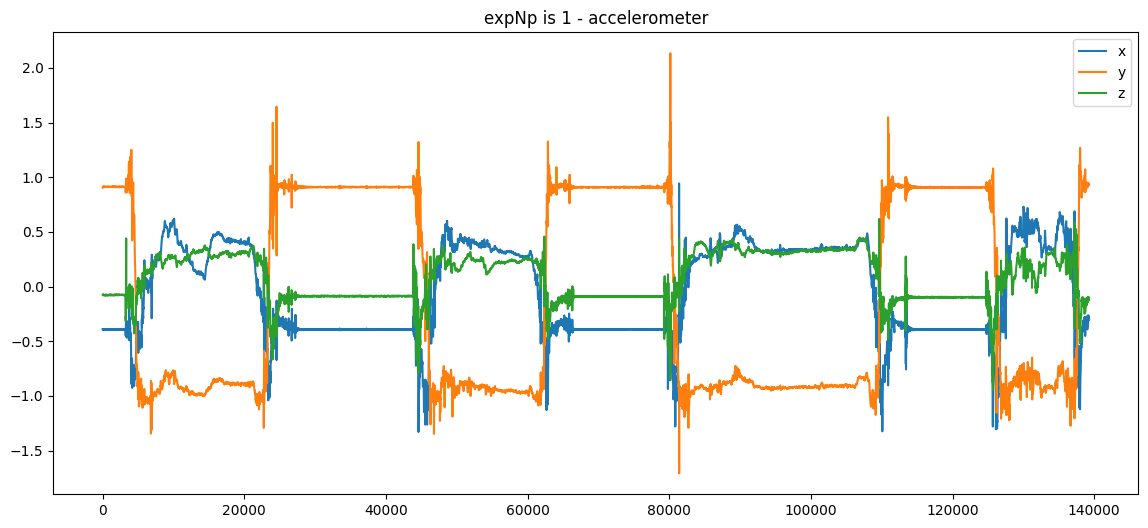

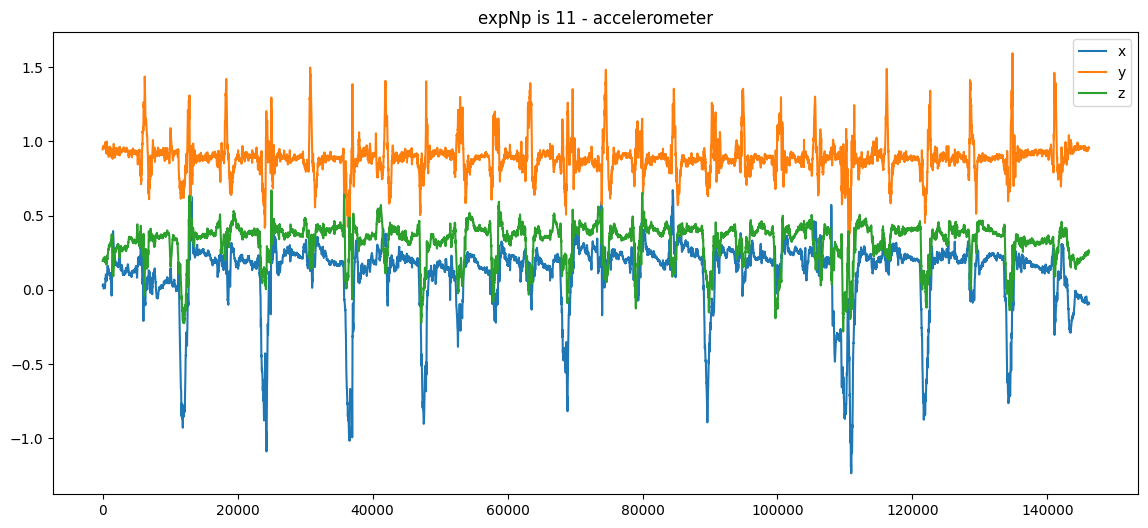

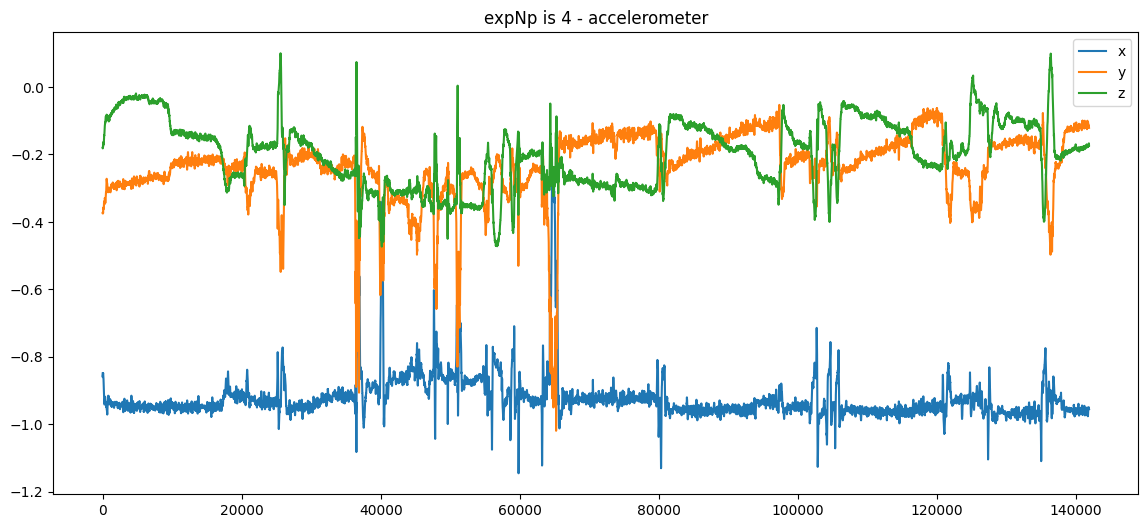

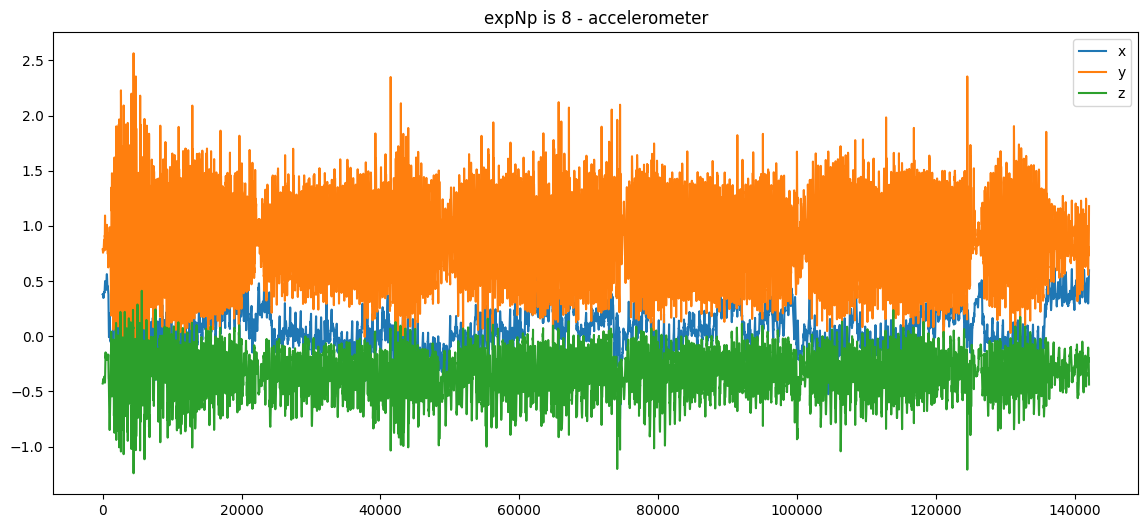

In [ ]:
fig_accelerometer(accelerometer[accelerometer['expNo']==1].iloc[1, :]['filePath'],1) # user24
fig_accelerometer(accelerometer[accelerometer['expNo']==11].iloc[18, :]['filePath'],11) # user14
fig_accelerometer(accelerometer[accelerometer['expNo']==4].iloc[8, :]['filePath'],4) # user 19
fig_accelerometer(accelerometer[accelerometer['expNo']==8].iloc[8, :]['filePath'],8) # user18

In [ ]:
print(gyroscope[gyroscope['expNo']==1].iloc[1, :]['filePath'].split('/')[5])
print(gyroscope[gyroscope['expNo']==11].iloc[18, :]['filePath'].split('/')[5])
print(gyroscope[gyroscope['expNo']==4].iloc[8, :]['filePath'].split('/')[5])
print(gyroscope[gyroscope['expNo']==8].iloc[8, :]['filePath'].split('/')[5])

User24
User14
User27
User19


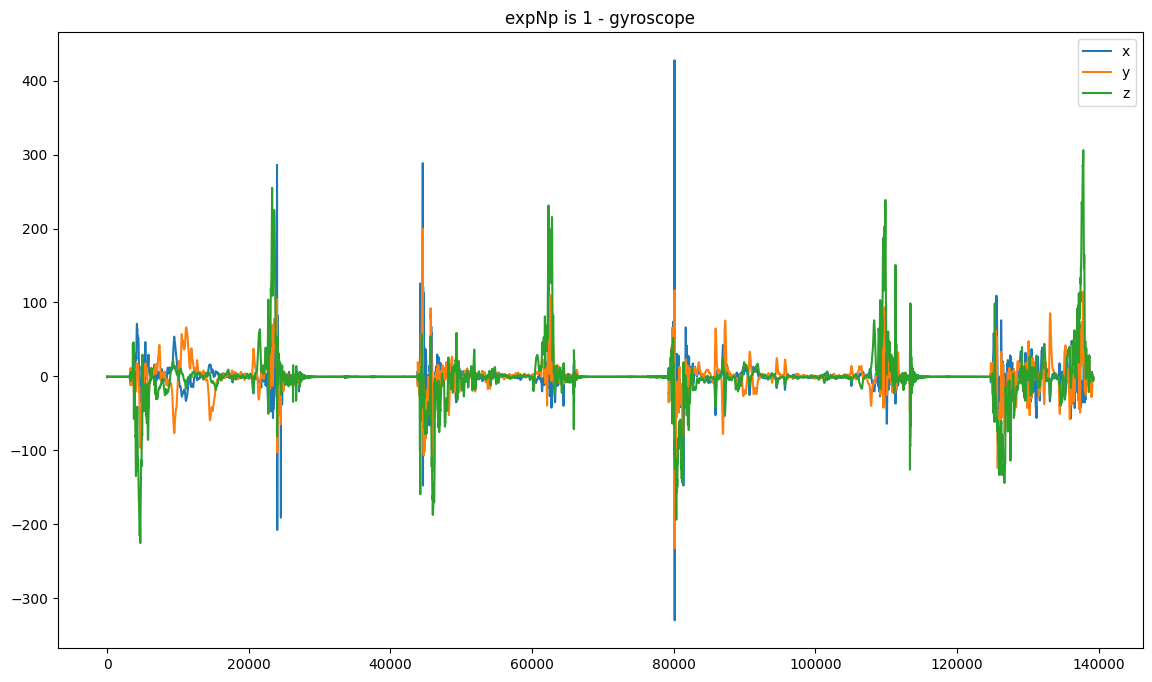

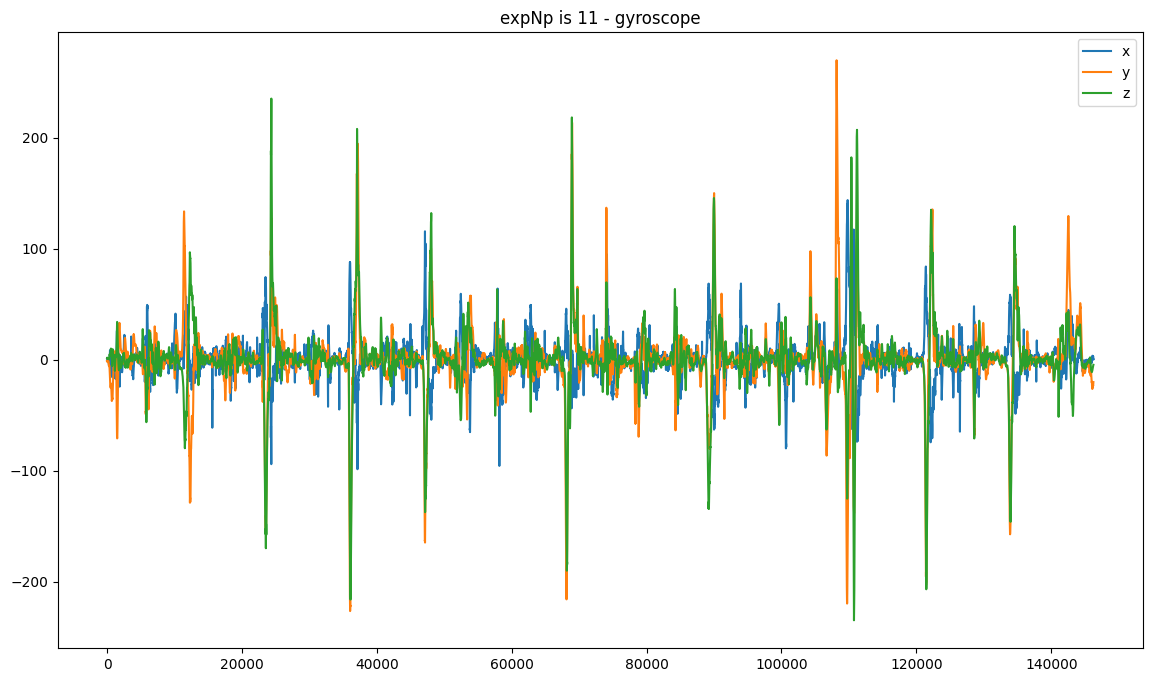

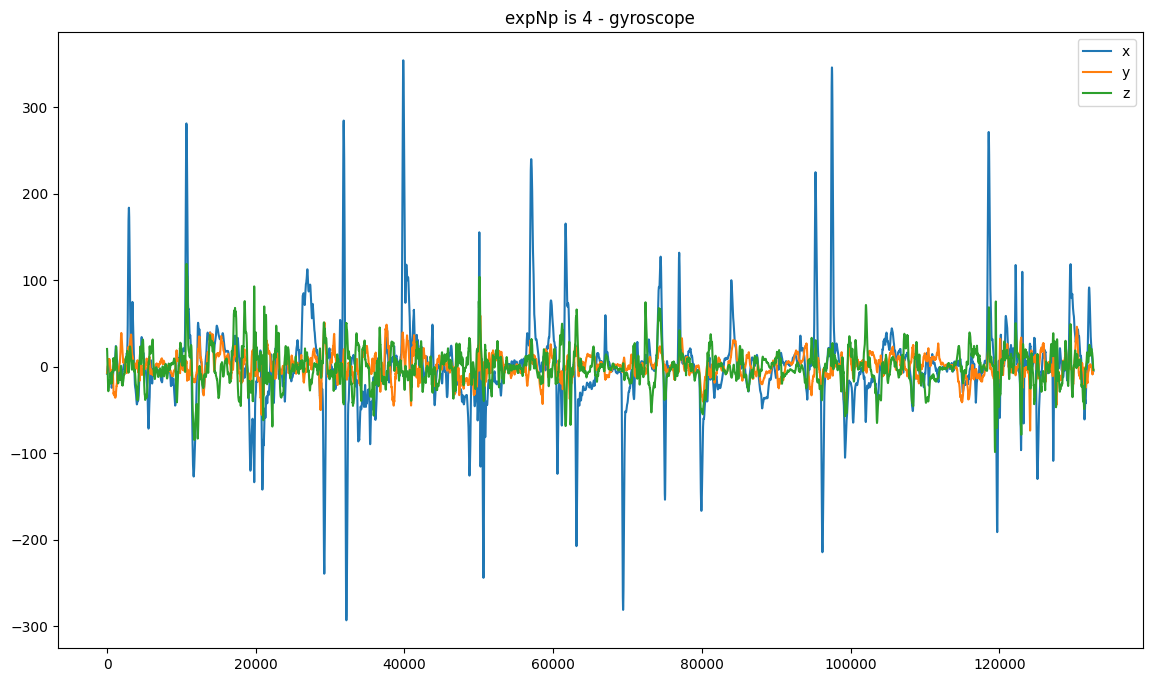

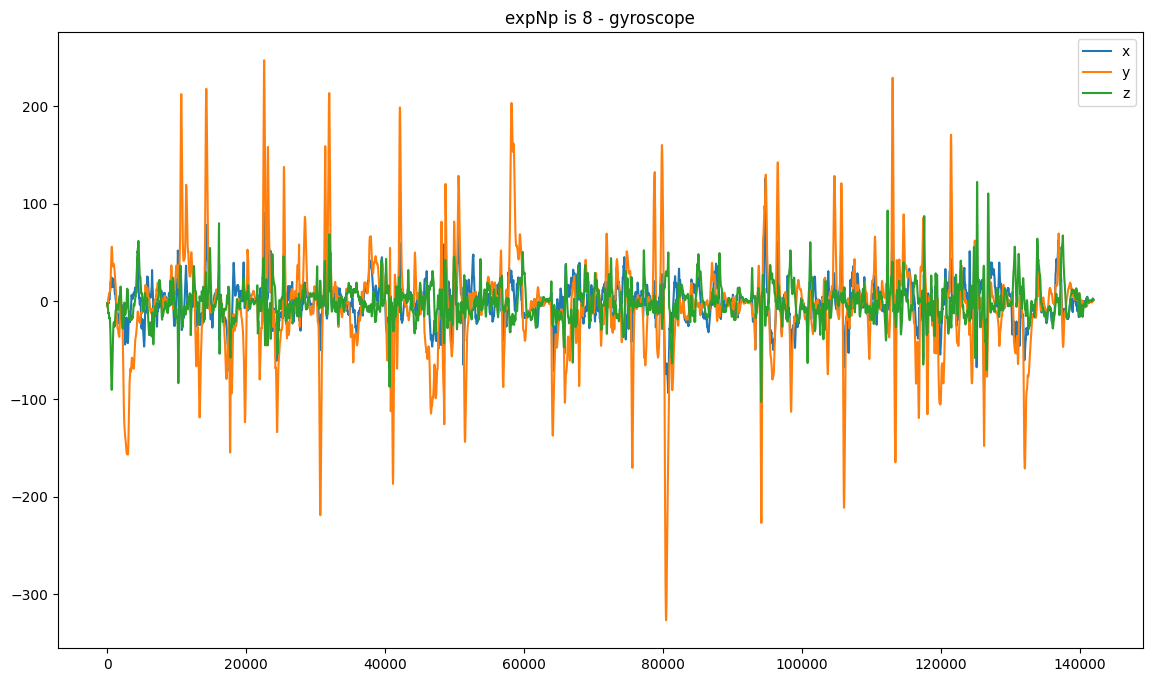

In [ ]:
fig_gyroscope(gyroscope[gyroscope['expNo']==1].iloc[1, :]['filePath'],1) # user 24
fig_gyroscope(gyroscope[gyroscope['expNo']==11].iloc[18, :]['filePath'],11) # user 14
fig_gyroscope(gyroscope[gyroscope['expNo']==4].iloc[8, :]['filePath'],4) # user 27
fig_gyroscope(gyroscope[gyroscope['expNo']==8].iloc[8, :]['filePath'],8) # user 19

In [ ]:
print(magnetometer[magnetometer['expNo']==1].iloc[1, :]['filePath'].split('/')[5])
print(magnetometer[magnetometer['expNo']==11].iloc[18, :]['filePath'].split('/')[5])
print(magnetometer[magnetometer['expNo']==4].iloc[8, :]['filePath'].split('/')[5])
print(magnetometer[magnetometer['expNo']==8].iloc[8, :]['filePath'].split('/')[5])

User24
User14
User27
User19


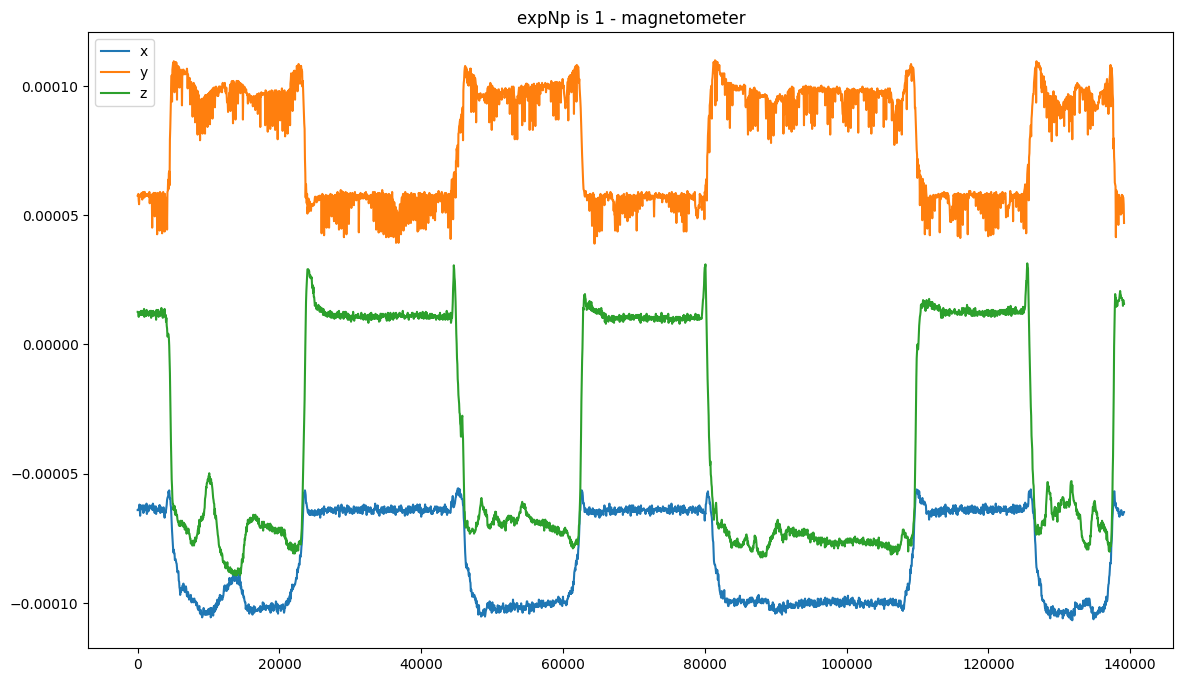

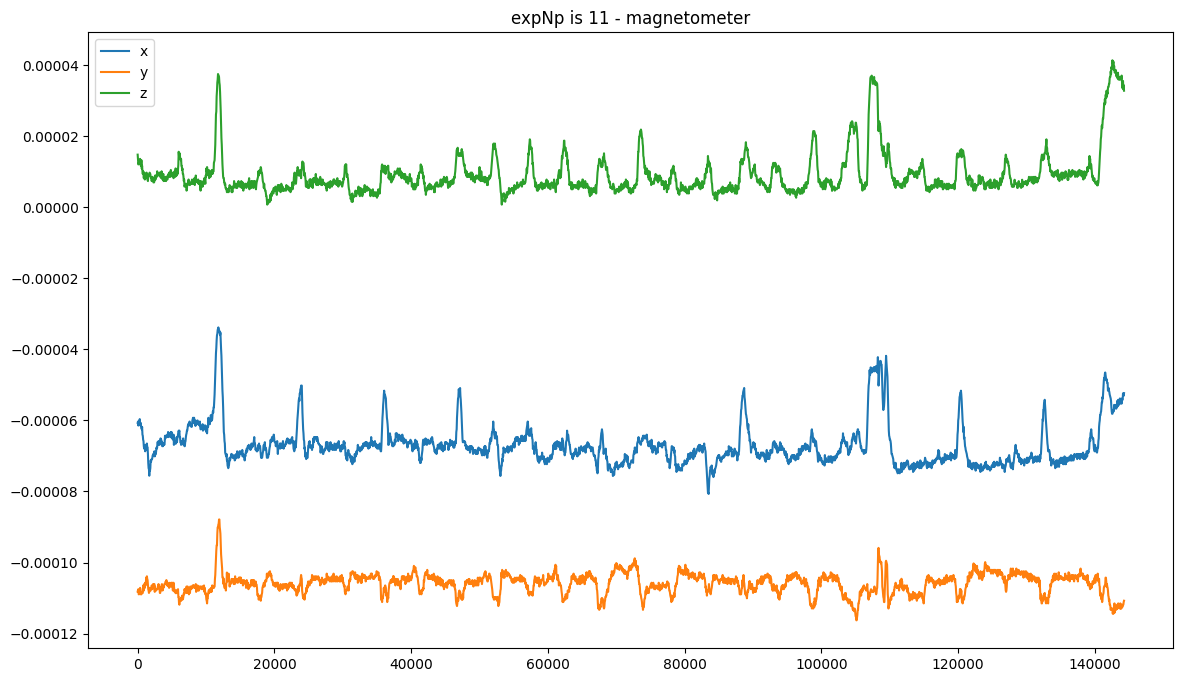

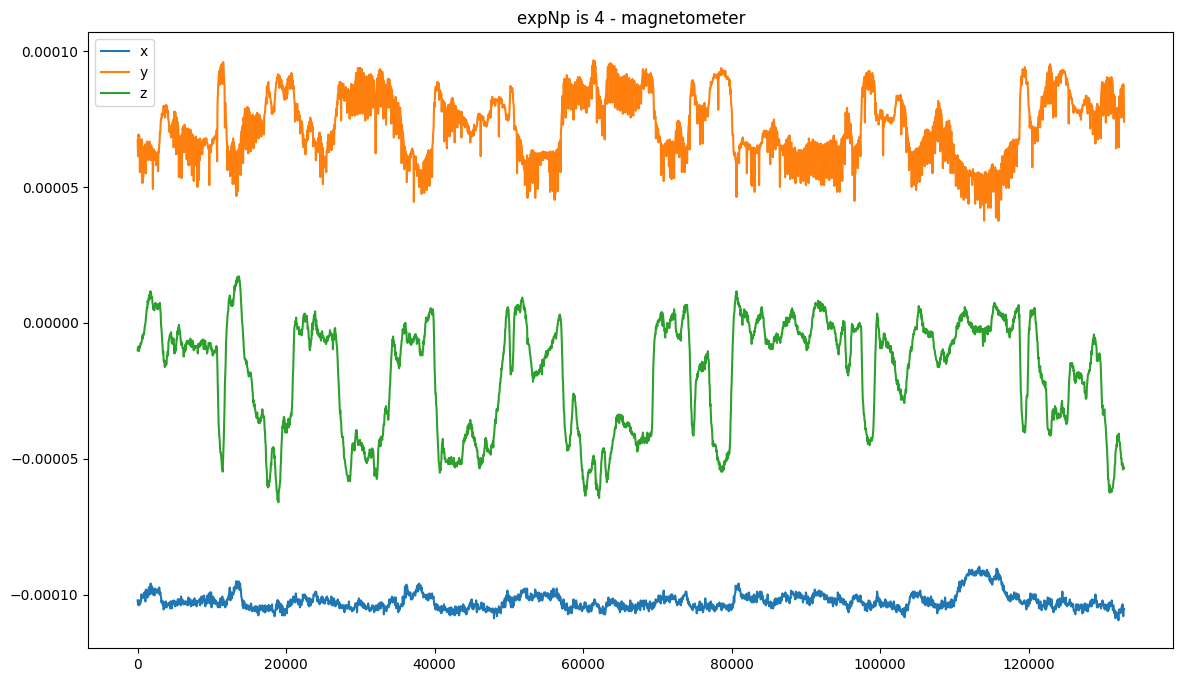

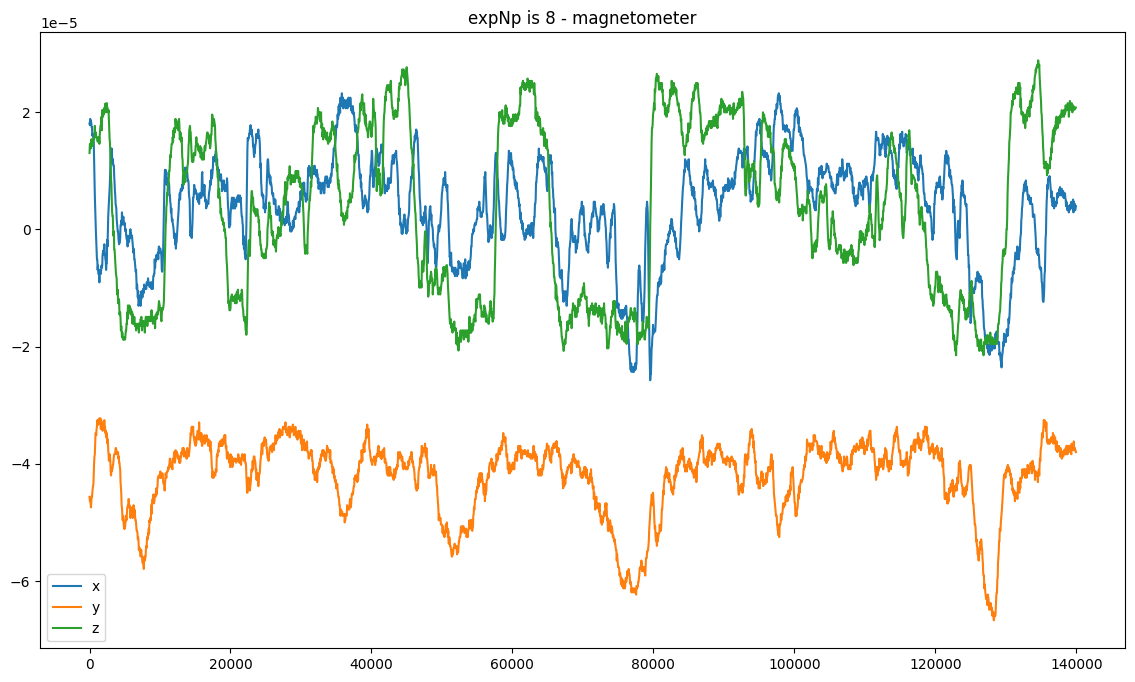

In [ ]:
fig_magnetometer(magnetometer[magnetometer['expNo']==1].iloc[1, :]['filePath'],1) # User24
fig_magnetometer(magnetometer[magnetometer['expNo']==11].iloc[18, :]['filePath'],11) # user 14
fig_magnetometer(magnetometer[magnetometer['expNo']==4].iloc[8, :]['filePath'],4) # user 27
fig_magnetometer(magnetometer[magnetometer['expNo']==8].iloc[8, :]['filePath'],8) # user 19

In [ ]:
print(pressure[pressure['expNo']==1].iloc[1, :]['filePath'].split('/')[5])
print(pressure[pressure['expNo']==11].iloc[18, :]['filePath'].split('/')[5])
print(pressure[pressure['expNo']==4].iloc[8, :]['filePath'].split('/')[5])
print(pressure[pressure['expNo']==8].iloc[8, :]['filePath'].split('/')[5])

User24
User14
User27
User19


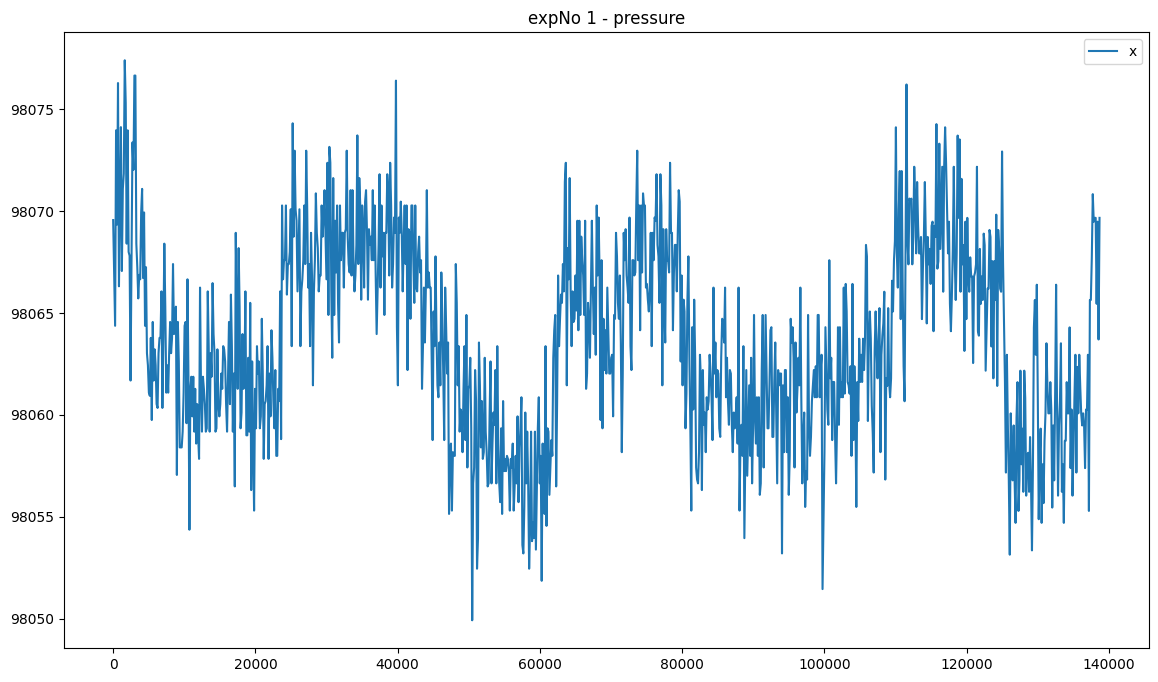

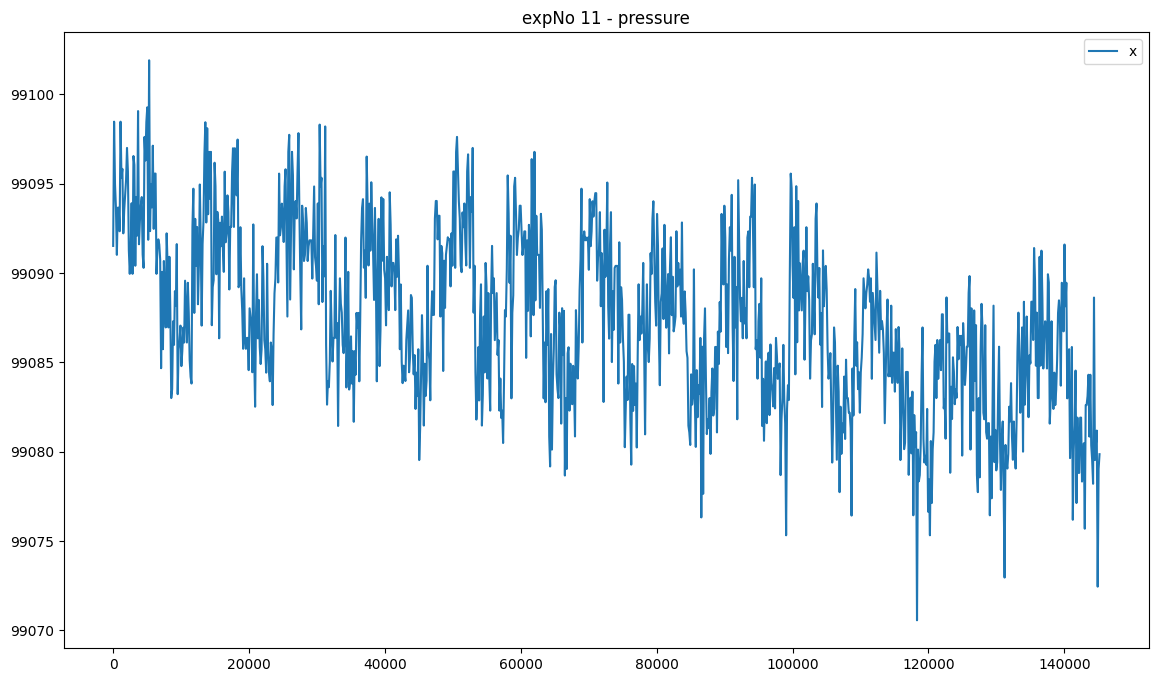

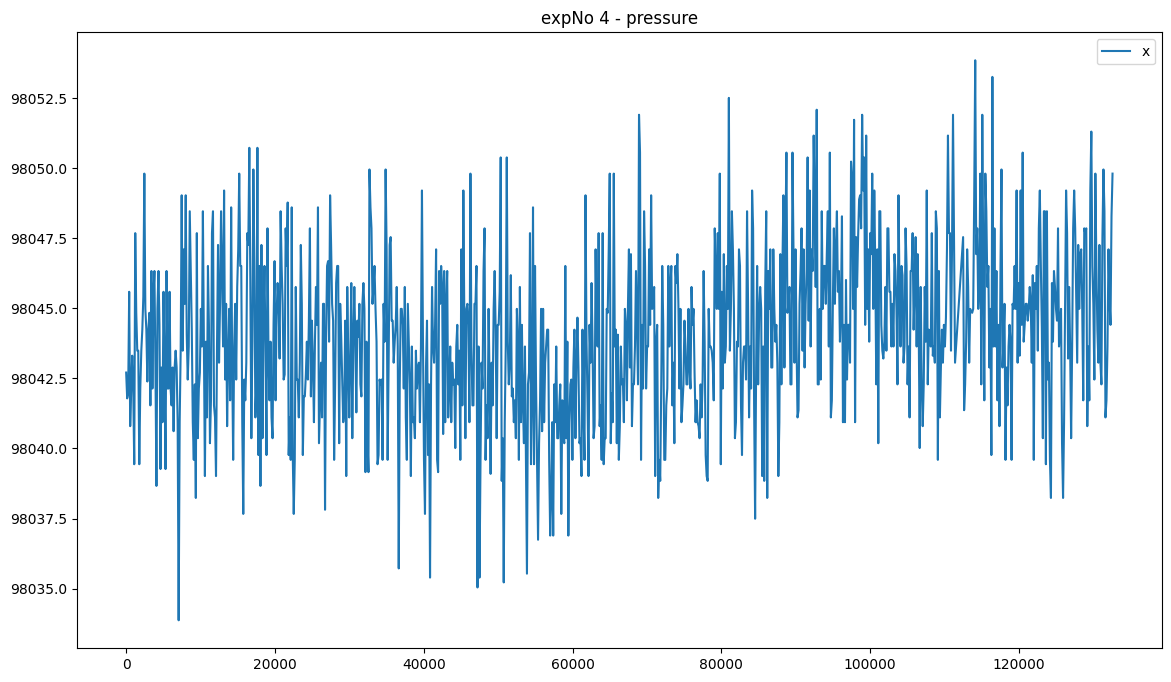

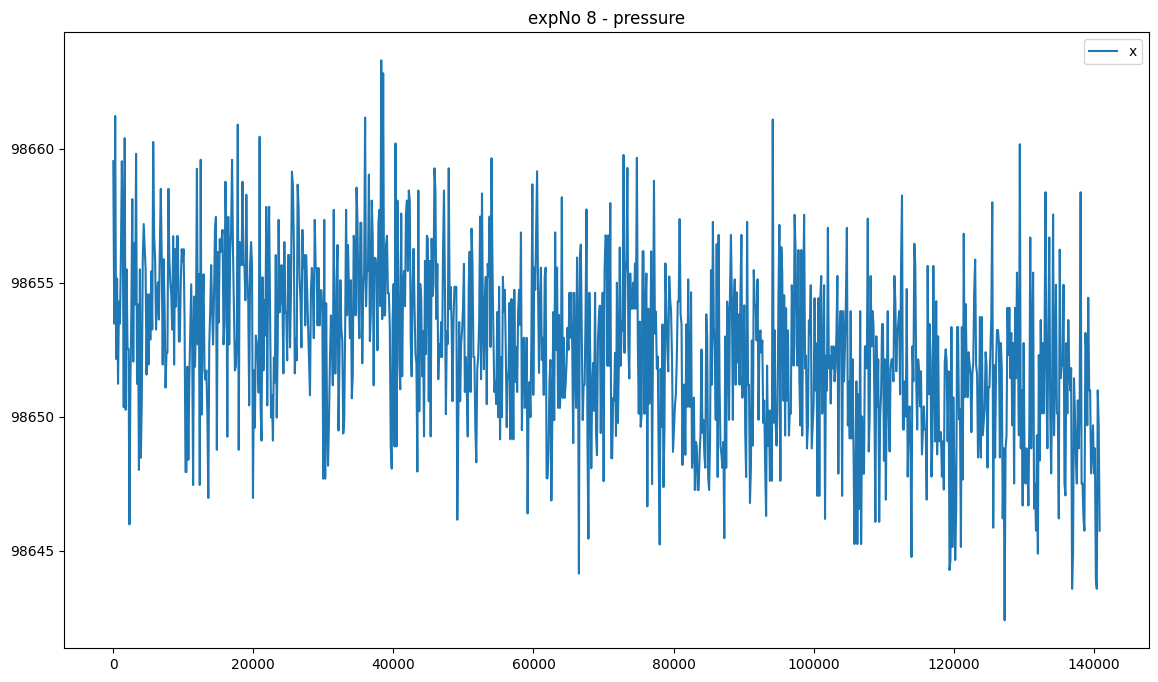

In [ ]:
fig_pressure(pressure[pressure['expNo']==1].iloc[1, :]['filePath'],1) # User24
fig_pressure(pressure[pressure['expNo']==11].iloc[18, :]['filePath'],11) # user 14
fig_pressure(pressure[pressure['expNo']==4].iloc[8, :]['filePath'],4) # user 27
fig_pressure(pressure[pressure['expNo']==8].iloc[8, :]['filePath'],8) # user 19

In [ ]:
result_list = []

for expId in df['expId'].value_counts().index:
  temp_df = df[df['expId'] == expId]
  acc_df = pd.read_csv(accelerometer.iloc[0 , 0])
  acc_df.columns = ['epoch', 'time', 'elapsed', 'x', 'y', 'z']
  accd_df = acc_df[['x', 'y', 'z']]

  gyro_df = pd.read_csv(gyroscope.iloc[0 , 0])
  gyro_df.columns = ['epoch', 'time', 'elapsed', 'x', 'y', 'z']
  gyro_df = acc_df[['x', 'y', 'z']]

  window_size = 100

  for i in range(0, len(accd_df) - window_size, window_size):
    window_acc_data = accd_df.iloc[i:i+window_size]

    acc_x_mean = window_acc_data['x'].mean()
    acc_y_mean = window_acc_data['y'].mean()
    acc_z_mean = window_acc_data['z'].mean()

    acc_x_var = window_acc_data['x'].var()
    acc_y_var = window_acc_data['y'].var()
    acc_z_var = window_acc_data['z'].var()

    acc_x_std = window_acc_data['x'].std()
    acc_y_std = window_acc_data['y'].std()
    acc_z_std = window_acc_data['z'].std()

    window_gyro_data = gyro_df.iloc[i:i+window_size]
    gyro_x_mean = window_gyro_data['x'].mean()
    gyro_y_mean = window_gyro_data['y'].mean()
    gyro_z_mean = window_gyro_data['z'].mean()

    gyro_x_var = window_gyro_data['x'].var()
    gyro_y_var = window_gyro_data['y'].var()
    gyro_z_var = window_gyro_data['z'].var()

    gyro_x_std = window_gyro_data['x'].std()
    gyro_y_std = window_gyro_data['y'].std()
    gyro_z_std = window_gyro_data['z'].std()
    try:
      result_list.append([acc_x_mean, acc_y_mean, acc_z_mean, acc_x_var, acc_y_var, acc_z_var, acc_x_std, acc_y_std, acc_z_std,
                          gyro_x_mean, gyro_y_mean, gyro_z_mean, gyro_x_var, gyro_y_var, gyro_z_var, gyro_x_std, gyro_y_std, gyro_z_std,
                          acc_df.iloc[0, 5],expId
                          ])
    except:
      print(expId)





In [ ]:
result_df = pd.DataFrame(result_list)
print(result_df)

            0        1        2         3         4         5         6   \
0      0.02801 -1.01260  0.26494  0.000105  0.000053  0.000090  0.010258   
1      0.08117 -1.00656  0.23732  0.012768  0.000816  0.007063  0.112995   
2      0.13821 -1.00757  0.18426  0.008889  0.001562  0.001952  0.094280   
3      0.08092 -1.01782  0.20344  0.000973  0.000849  0.000227  0.031191   
4      0.06570 -1.02329  0.20492  0.000115  0.000083  0.000098  0.010708   
...        ...      ...      ...       ...       ...       ...       ...   
28111 -0.10017 -0.89065  0.55675  0.004695  0.004430  0.011813  0.068517   
28112 -0.18983 -0.66582  0.80430  0.000973  0.007985  0.005374  0.031186   
28113 -0.13471 -0.68012  0.80420  0.007513  0.007527  0.006184  0.086677   
28114  0.01838 -0.86938  0.59336  0.004288  0.001199  0.002966  0.065486   
28115 -0.08761 -0.80222  0.69055  0.000142  0.000066  0.000145  0.011908   

             7         8        9        10       11        12        13  \
0      0.00

In [ ]:
result_df.isna().sum()

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [ ]:
result_df.columns = ["acc_x_mean", "acc_y_mean", "acc_z_mean", "acc_x_var", "acc_y_var", "acc_z_var", "acc_x_std", "acc_y_std", "acc_z_std",
                          "gyro_x_mean", "gyro_y_mean", "gyro_z_mean", "gyro_x_var", "gyro_y_var", "gyro_z_var", "gyro_x_std", "gyro_y_std", "gyro_z_std",
                          "date",'expId'
                          ]
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28116 entries, 0 to 28115
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   acc_x_mean   28116 non-null  float64
 1   acc_y_mean   28116 non-null  float64
 2   acc_z_mean   28116 non-null  float64
 3   acc_x_var    28116 non-null  float64
 4   acc_y_var    28116 non-null  float64
 5   acc_z_var    28116 non-null  float64
 6   acc_x_std    28116 non-null  float64
 7   acc_y_std    28116 non-null  float64
 8   acc_z_std    28116 non-null  float64
 9   gyro_x_mean  28116 non-null  float64
 10  gyro_y_mean  28116 non-null  float64
 11  gyro_z_mean  28116 non-null  float64
 12  gyro_x_var   28116 non-null  float64
 13  gyro_y_var   28116 non-null  float64
 14  gyro_z_var   28116 non-null  float64
 15  gyro_x_std   28116 non-null  float64
 16  gyro_y_std   28116 non-null  float64
 17  gyro_z_std   28116 non-null  float64
 18  date         28116 non-null  float64
 19  expI

In [ ]:
from google.colab import files
files.download('your_notebook.pdf')

FileNotFoundError: Cannot find file: your_notebook.pdf